## Classification using scikit-learn
For this problem, I will experiment with various classifiers provided as part of the scikit-learn (sklearn) machine learning module, as well as with some of its preprocessing and model evaluation capabilities. 

### Data Set Information

This is a small data set contains 600 customer records. The marketing department of a financial firm keeps records on customers, including demographic information and, number of type of accounts. When launching a new product, such as a "Personal Equity Plan" (PEP), a direct mail piece or a targeted email, advertising the product, is sent to existing customers, and a record kept as to whether that customer responded and bought the product. Based on this database of prior cases, the managers decide to use data mining techniques to build customer profile models in order to predict the behavior of future customers. Each record is a customer description where the "pep" field indicates whether or not that customer has purchased a PEP. For classification problems, this field is used as the target attribute (with "YES" and "NO") as class labels. The data contains the following fields:

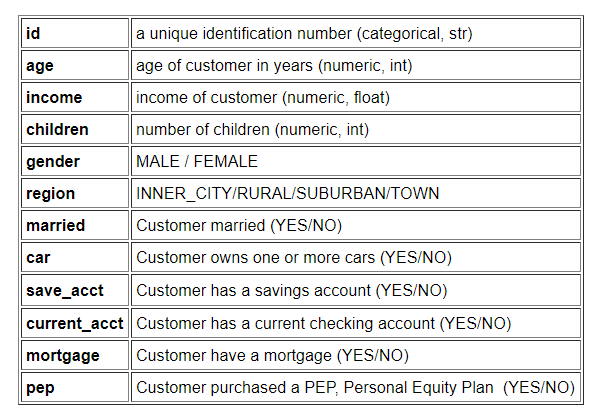

In [6]:
from IPython.display import Image
Image(filename='data exploratory NB1.png')

### A. Load and preprocess the data using Numpy or Pandas and the preprocessing functions from scikit-learn. 
 
1. Separate the target attribute ("pep") from the portion of the data to be used for training and testing. 
2. Convert the selected dataset into the Standard Spreadsheet format (scikit-learn functions generally assume that all attributes are in numeric form). 
3. Finally, split the transformed data into training and test sets (80%-20% randomized split)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#load data / remove the target class / transform to standard spreadsheet
bank=pd.read_csv("C:/Users/Rai Chiang/Desktop/478 assignment2 data/bank_data.csv")
bank_class=bank.pep
bank=bank.drop(["pep"],axis=1)
bank=pd.get_dummies(bank) #scikit-learn functions generally assume that all attributes are in numeric form
bank=bank.reindex(np.random.permutation(bank.index))

#seperate data into training set and testing set
from sklearn.cross_validation import train_test_split
train_bank,test_bank,train_class,test_class=train_test_split(bank,bank_class,train_size=0.8,random_state=7)

#min max transformation
from sklearn import preprocessing  
MinMaxScaler=preprocessing.MinMaxScaler().fit(train_bank)
norm_train_bank=MinMaxScaler.fit_transform(train_bank) 
norm_test_bank=MinMaxScaler.fit_transform(test_bank)

#for consistent convert class_labels into array.*Note that while Scikit-learn functions accept Pandas dataframes as input, they return Numpy arrays
train_class=np.array([train_class]).T #transpose for the next step
test_class=np.array([test_class]).T

C:\Anacon\envs\py27\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### B. Run scikit-learn's KNN classifier on the test set. 
1. In the case of KNN, first normalize the data so that all attributes are in the same scale (normalize so that the values are between 0 and 1). 
2. Generate the confusion matrix (visualize it using Matplotlib), as well as the classification report. Also, compute the average accuracy score. 
3. Experiment with different values of K and the weight parameter (i.e., with or without distance weighting) for KNN to see if the accuracy could improve

##### According to the experiment result down below, both the scikit-learn's KNN classifier with distance weight and uniform weight have similar results. Both of them have the same k value(19) for the best accuracy. 0.5 for distance weight and 0.53 for uniform weight

In [5]:
from sklearn import neighbors
import operator


def best_accuracy(knum,weights):
    if weights == "distance":
        weights="distance"
    elif weights == "uniform":
        weights="uniform"
    accuracy={}
    for k in range(1,knum,2):
        kncf=neighbors.KNeighborsClassifier(k,weights)
        kncf.fit(norm_train_bank,train_class)
        avg_accuracy=kncf.score(norm_test_bank,test_class) #apply model on test set to find the accuracy
        accuracy[k]=avg_accuracy
    table=pd.DataFrame(accuracy.items(),columns=["k","avg accuracy"])
    table.set_index("k",inplace=True)
    accuracy=sorted(accuracy.items(),key=operator.itemgetter(1))
    plot=plt.plot(table)
    print "best value of k with %s weighting is: %f avg accuracy is %0.4f: "%(weights,accuracy[-1][0],accuracy[-1][1])
    return table
    print table, plot

C:\Anacon\envs\py27\lib\site-packages\ipykernel\__main__.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


best value of k with distance weighting is: 19.000000 avg accuracy is 0.5083: 


,avg accuracy
k,
1,0.433333
3,0.450000
5,0.483333
7,0.475000
9,0.450000
11,0.450000
13,0.458333
15,0.483333
17,0.508333


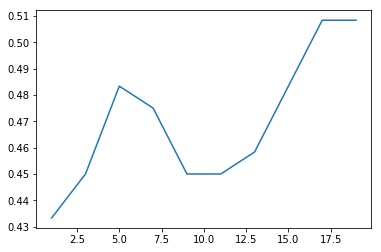

In [6]:
best_accuracy(21,"distance")

C:\Anacon\envs\py27\lib\site-packages\ipykernel\__main__.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


best value of k with uniform weighting is: 19.000000 avg accuracy is 0.5250: 


,avg accuracy
k,
1,0.433333
3,0.450000
5,0.483333
7,0.475000
9,0.450000
11,0.450000
13,0.458333
15,0.483333
17,0.508333


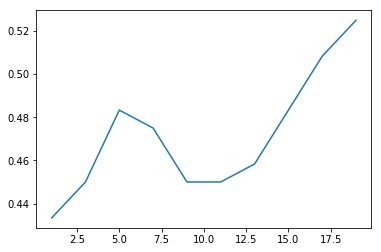

In [7]:
best_accuracy(21,"uniform")

In [10]:
#classification report and confusion matrix for k=1 wuth distance weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

bestk=1
k_d=neighbors.KNeighborsClassifier(bestk,weights="distance")
k_d.fit(norm_train_bank,train_class)
K_d_p=k_d.predict(norm_test_bank)
print "classification report and confusion matrix for k=1 wuth distance weight","\n"
print(classification_report(test_class,K_d_p)),"\n\n"
print confusion_matrix(test_class,K_d_p),"\n\n"

#classification report and confusion matrix for k=1 wuth uniform weight
k_u=neighbors.KNeighborsClassifier(bestk,weights="uniform")
k_u.fit(norm_train_bank,train_class)
k_u_p=k_u.predict(norm_test_bank)
print "classification report and confusion matrix for k=1 wuth uniform weight","\n"
print classification_report(k_u_p,test_class)
print confusion_matrix(k_u_p,test_class)

C:\Anacon\envs\py27\lib\site-packages\ipykernel\__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Anacon\envs\py27\lib\site-packages\ipykernel\__main__.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


 classification report and confusion matrix for k=1 wuth distance weight 

             precision    recall  f1-score   support

         NO       0.51      0.48      0.49        69
        YES       0.35      0.37      0.36        51

avg / total       0.44      0.43      0.44       120



[[33 36]
 [32 19]] 


classification report and confusion matrix for k=1 wuth uniform weight 

             precision    recall  f1-score   support

         NO       0.48      0.51      0.49        65
        YES       0.37      0.35      0.36        55

avg / total       0.43      0.43      0.43       120

[[33 32]
 [36 19]]


### C. Repeat the classification using scikit-learn's Decision Tree classifier (using the default parameters) and the Naive Bayes (Gaussian) classifier. 
1. Generate the confusion matrix, classification report, and average accuracy scores for each classifier. 
2. For each model, compare the average accuracry scores on the test and the training data sets.

#### As more parameters are added to a model, the complexity of the model rises and variance becomes primary concern while bias steadily falls. If the model fits the training dataset very well it would have a low bias, but it could have very high variance if it is a very high dimensional model or has tons of parameters.  A high recall and low precision model corresponds to the case of having high variance and low bias.Therefore, we have to focus on the f test rather than only looking at the accuracy.  With the result above,based on the accuracy we learn that the decision tree model performs the best among naive-bayes model and knn model. We can learn that among the model decistion tree model classifier has lowest error om prediction.

In [11]:
#decision tree classfier

from sklearn import tree

treeclf=tree.DecisionTreeClassifier()
treeclf.fit(norm_train_bank,train_class)
tree_p=treeclf.predict(norm_test_bank)
print "classification matrics:\n ",classification_report(test_class,tree_p)
print "confusion matrix\n",confusion_matrix(test_class,tree_p),"\n"

#apply the classifier on training set/testing set for the accuracy 
print "average accuracy score for decision tree classifier on training set:%0.3f "%(treeclf.score(norm_train_bank,train_class))
print "average accuracy score for decision tree classifier on testing set:%0.3f "%(treeclf.score(norm_test_bank,test_class))


classification matrics:
               precision    recall  f1-score   support

         NO       0.61      0.49      0.54        69
        YES       0.45      0.57      0.50        51

avg / total       0.54      0.53      0.53       120

confusion matrix
[[34 35]
 [22 29]] 

average accuracy score for decision tree classifier on training set:1.000 
average accuracy score for decision tree classifier on testing set:0.525 


In [12]:
#naive-bayes(gaussian)classifier

from sklearn import naive_bayes
nbclf=naive_bayes.GaussianNB()
nbclf.fit(norm_train_bank,train_class)
nbclf_p=nbclf.predict(norm_test_bank)
print "classification matrics:\n",classification_report(test_class,nbclf_p)
print  "confusion matrix\n",confusion_matrix(test_class,nbclf_p),"\n"
print  "average accuracy score for naive-bayes classifier on training set:%0.3f "%(nbclf.score(norm_train_bank,train_class))
print  "average accuracy score for naive-bayes classifier on training set:%0.3f "%(nbclf.score(norm_test_bank,test_class))


classification matrics:
             precision    recall  f1-score   support

         NO       0.00      0.00      0.00        69
        YES       0.42      1.00      0.60        51

avg / total       0.18      0.42      0.25       120

confusion matrix
[[ 0 69]
 [ 0 51]] 

average accuracy score for naive-bayes classifier on training set:1.000 
average accuracy score for naive-bayes classifier on training set:0.425 


C:\Anacon\envs\py27\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anacon\envs\py27\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
